In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [3]:
encodings_to_try = ['utf-8-sig', 'latin-1', 'ISO-8859-1']

for encoding in encodings_to_try:
    try:
        df = pd.read_csv("C:/Users/15694/Desktop/Cross selling/code/Michelle/Without_standerdize.csv", encoding=encoding)
        break
    except UnicodeDecodeError:
        continue

In [4]:
df.head()

,NPA_FLAG,SIX_MONTH_BAL_OS_SAVINGS,SIX_MONTH_BAL_OS_CURRENT,SIX_MONTH_BAL_OS_FD,SIX_MONTH_BAL_OS_LEASING,SIX_MONTH_BAL_OS_CARD,SIX_MONTH_BAL_OS_OD,TOTAL_AVG_BAL,FD_AMOUNT_UNDER_LIEN,CURRENT_AMOUNT_UNDER_LIEN,SAVINGS_AMOUNT_UNDER_LIEN,CUSTOMER_PROFITABILITY,DEBIT_CARD_USAGE,CREDIT_CARD_USAGE,LOAN_CAT,NO_OF_ASSERT_ACCOUNTS,NO_OF_LIABILITY_ACCOUNTS,LOAN_CAT1
0,0,699504.75,0.0,378962.46,0.0,20623.80,0.00,3146530.15,0.0,0.0,0.0,13770.79,200131.0,61300.72,0,1.0,7.0,3
1,0,53083.62,0.0,2838709.68,0.0,0.00,0.00,4643556.31,0.0,0.0,0.0,1560.99,0.0,0.00,0,0.0,4.0,3
2,0,4540.64,0.0,4000000.00,0.0,0.00,0.00,7265196.47,0.0,0.0,0.0,5307.59,0.0,0.00,0,0.0,3.0,3
3,0,125762.58,0.0,2130590.11,0.0,227326.09,126526.97,2790521.87,0.0,0.0,0.0,8324.88,96000.0,0.00,0,2.0,7.0,1
4,0,79470.60,0.0,0.00,0.0,0.00,0.00,131951.72,0.0,0.0,0.0,231.41,0.0,0.00,0,0.0,1.0,0


In [5]:
df.columns

Index(['NPA_FLAG', 'SIX_MONTH_BAL_OS_SAVINGS', 'SIX_MONTH_BAL_OS_CURRENT',
       'SIX_MONTH_BAL_OS_FD', 'SIX_MONTH_BAL_OS_LEASING',
       'SIX_MONTH_BAL_OS_CARD', 'SIX_MONTH_BAL_OS_OD', 'TOTAL_AVG_BAL',
       'FD_AMOUNT_UNDER_LIEN', 'CURRENT_AMOUNT_UNDER_LIEN',
       'SAVINGS_AMOUNT_UNDER_LIEN', 'CUSTOMER_PROFITABILITY',
       'DEBIT_CARD_USAGE', 'CREDIT_CARD_USAGE', 'LOAN_CAT',
       'NO_OF_ASSERT_ACCOUNTS', 'NO_OF_LIABILITY_ACCOUNTS', 'LOAN_CAT1'],
      dtype='object')

In [6]:
df.shape

(74494, 18)

In [7]:
df.isna().sum()

NPA_FLAG                     0
SIX_MONTH_BAL_OS_SAVINGS     0
SIX_MONTH_BAL_OS_CURRENT     0
SIX_MONTH_BAL_OS_FD          0
SIX_MONTH_BAL_OS_LEASING     0
SIX_MONTH_BAL_OS_CARD        0
SIX_MONTH_BAL_OS_OD          0
TOTAL_AVG_BAL                0
FD_AMOUNT_UNDER_LIEN         0
CURRENT_AMOUNT_UNDER_LIEN    0
SAVINGS_AMOUNT_UNDER_LIEN    0
CUSTOMER_PROFITABILITY       0
DEBIT_CARD_USAGE             0
CREDIT_CARD_USAGE            0
LOAN_CAT                     0
NO_OF_ASSERT_ACCOUNTS        0
NO_OF_LIABILITY_ACCOUNTS     0
LOAN_CAT1                    0
dtype: int64

In [8]:
df1=df[["TOTAL_AVG_BAL","SIX_MONTH_BAL_OS_FD","NPA_FLAG","SIX_MONTH_BAL_OS_LEASING",
        "CUSTOMER_PROFITABILITY","SIX_MONTH_BAL_OS_SAVINGS"
        ,"LOAN_CAT1"]]

In [9]:
# Final dataset

In [10]:
filepath=r"C://Users//15694//Desktop//Cross selling//code//Michelle//Final_cross_selling_Dataset_ML1.csv"
df1.to_csv(filepath, index=False)

In [11]:
df1.head()

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS,LOAN_CAT1
0,3146530.15,378962.46,0,0.0,13770.79,699504.75,3
1,4643556.31,2838709.68,0,0.0,1560.99,53083.62,3
2,7265196.47,4000000.00,0,0.0,5307.59,4540.64,3
3,2790521.87,2130590.11,0,0.0,8324.88,125762.58,1
4,131951.72,0.00,0,0.0,231.41,79470.60,0


In [12]:
df1.shape

(74494, 7)

In [13]:
df1['LOAN_CAT1'].value_counts()

3    27369
1    21471
2    12360
5     5978
4     5311
0     2005
Name: LOAN_CAT1, dtype: int64

In [14]:
# 0= 0-100,000
# 1= 100,0000-500,000
# 2= 500,000-1,000,000
# 3=1,000,000 - 5,000,000
# 4=5,000,000-10,000,000
# 5=above 10,000,000

In [15]:
X = df1.drop(columns=["LOAN_CAT1"])
Y = df1["LOAN_CAT1"]

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score, f1_score,  classification_report, confusion_matrix



In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

In [18]:
y_train.value_counts()

3    19130
1    15095
2     8615
5     4203
4     3684
0     1418
Name: LOAN_CAT1, dtype: int64

In [19]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from collections import Counter
sm = SMOTE()
X_sm, Y_sm=sm.fit_resample(X_train,y_train)
print('Dataset after resampling:')
print(sorted(Counter(Y_sm).items()))

Dataset after resampling:
[(0, 19130), (1, 19130), (2, 19130), (3, 19130), (4, 19130), (5, 19130)]


In [20]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
scaler=scaler.fit(X_sm)
X_resampled=scaler.transform(X_sm)
X_test=scaler.transform(X_test)


In [21]:
import joblib
scaler_filename = "scaler.save"
joblib.dump(scaler, scaler_filename) 

['scaler.save']

In [22]:
import xgboost as xgb
xg_boost=xgb.XGBClassifier()
xg_boost.fit(X_resampled, Y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Make predictions on the test set
y_pred = xg_boost.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec_macro = precision_score(y_test, y_pred, average='macro')
recall_macro = recall_score(y_test, y_pred, average='macro')
f1_macro = f1_score(y_test, y_pred, average='macro')
classification_rep = classification_report(y_test, y_pred)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cf_matrix)
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.7309499306456665
Precision (Macro): 0.6722216239008075
Recall (Macro): 0.7547200322860729
F1 Score (Macro): 0.6950471998720432
Confusion Matrix:
[[ 483   86   13    3    1    1]
 [ 592 4698 1023   50   10    3]
 [  51  649 2662  361   18    4]
 [  34  148 1309 5851  837   60]
 [   2    6    7  249 1156  207]
 [   1    1    5   37  245 1486]]

Classification Report:
               precision    recall  f1-score   support

           0       0.42      0.82      0.55       587
           1       0.84      0.74      0.79      6376
           2       0.53      0.71      0.61      3745
           3       0.89      0.71      0.79      8239
           4       0.51      0.71      0.59      1627
           5       0.84      0.84      0.84      1775

    accuracy                           0.73     22349
   macro avg       0.67      0.75      0.70     22349
weighted avg       0.77      0.73      0.74     22349



In [24]:
y_pred_train_XG = xg_boost.predict(X_resampled)

In [25]:
acc = accuracy_score(Y_sm, y_pred_train_XG)
prec_macro = precision_score(Y_sm, y_pred_train_XG, average='macro')
recall_macro = recall_score(Y_sm, y_pred_train_XG, average='macro')
f1_macro = f1_score(Y_sm, y_pred_train_XG, average='macro')
classification_rep = classification_report(Y_sm,y_pred_train_XG)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_XG = confusion_matrix(Y_sm, y_pred_train_XG)
print("Confusion Matrix:")
print(cf_matrix_XG )
print("\nClassification Report:\n", classification_rep)

Accuracy Score: 0.846549921589127
Precision (Macro): 0.8475181760362682
Recall (Macro): 0.8465499215891271
F1 Score (Macro): 0.8463028558157745
Confusion Matrix:
[[18533   397   139    54     5     2]
 [ 1501 15100  2413    98    10     8]
 [  196  2840 15129   909    43    13]
 [   52   273  2562 14508  1659    76]
 [   24     5    48  1694 16582   777]
 [    0     2     6   148  1659 17315]]

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94     19130
           1       0.81      0.79      0.80     19130
           2       0.75      0.79      0.77     19130
           3       0.83      0.76      0.79     19130
           4       0.83      0.87      0.85     19130
           5       0.95      0.91      0.93     19130

    accuracy                           0.85    114780
   macro avg       0.85      0.85      0.85    114780
weighted avg       0.85      0.85      0.85    114780



In [26]:
from sklearn.metrics import roc_curve,auc
y_prob1=xg_boost.predict_proba(X_test)

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob1,multi_class='ovr')

0.9514461040294492

In [28]:
# tuning

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
xgb= XGBClassifier()
xg_param_grid = {
              'n_estimators' : [100,200],
              'learning_rate': [0.01, 0.005],
              'max_depth': [4,8],
               'booster': ['gbtree'], 
              'min_samples_leaf': [100,150],
              
              }

In [30]:
gsxgb = GridSearchCV(xgb,param_grid = xg_param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 2)

gsxgb.fit(X_resampled, Y_sm)


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:58:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=4,
             param_grid={'booster': ['gbtree'], 'learning_rate': [0.01, 0.005],
                         'max_depth': [4, 8], 'min_samples_leaf': [100, 150],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=2)

In [31]:
gsxgb.best_estimator_

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [32]:
best_xg_GCV=XGBClassifier(max_depth=8, n_estimators=200,learning_rate=0.01,min_samples_leaf=100)
best_xg_GCV.fit(X_resampled, Y_sm)

C:\Users\15694\AppData\Roaming\Python\Python311\site-packages\xgboost\core.py:158: UserWarning: [16:58:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "min_samples_leaf" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, min_samples_leaf=100, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [33]:
y_pred_xg_GCV = best_xg_GCV.predict(X_test)
y_pred_xg_GCV_train = best_xg_GCV.predict(X_resampled)

In [34]:
acc = accuracy_score(y_test, y_pred_xg_GCV)
prec_macro = precision_score(y_test,y_pred_xg_GCV, average='macro')
recall_macro = recall_score(y_test, y_pred_xg_GCV, average='macro')
f1_macro = f1_score(y_test,y_pred_xg_GCV, average='macro')
classification_rep_xg_GCV = classification_report(y_test,y_pred_xg_GCV)
print("Accuracy Score:", acc)
print("Precision (Macro):", prec_macro)
print("Recall (Macro):", recall_macro)
print("F1 Score (Macro):", f1_macro)

# Confusion Matrix
cf_matrix_xg_gcv = confusion_matrix(y_test, y_pred_xg_GCV)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv)
print("\n Test Classification Report:\n", classification_rep_xg_GCV)

Accuracy Score: 0.7160051903888317
Precision (Macro): 0.6637616877386424
Recall (Macro): 0.7550674014150967
F1 Score (Macro): 0.6835227474664181
Confusion Matrix:
[[ 502   63   19    1    1    1]
 [ 713 4420 1169   52   19    3]
 [  68  597 2685  358   31    6]
 [  25  123 1358 5716  958   59]
 [   2    7   12  223 1209  174]
 [   1    1    2   25  276 1470]]

 Test Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.86      0.53       587
           1       0.85      0.69      0.76      6376
           2       0.51      0.72      0.60      3745
           3       0.90      0.69      0.78      8239
           4       0.48      0.74      0.59      1627
           5       0.86      0.83      0.84      1775

    accuracy                           0.72     22349
   macro avg       0.66      0.76      0.68     22349
weighted avg       0.77      0.72      0.73     22349



In [35]:
acc1 = accuracy_score(Y_sm, y_pred_xg_GCV_train)
prec_macro1 = precision_score(Y_sm,y_pred_xg_GCV_train, average='macro')
recall_macro1 = recall_score(Y_sm, y_pred_xg_GCV_train, average='macro')
f1_macro1 = f1_score(Y_sm,y_pred_xg_GCV_train, average='macro')
classification_rep_xg_GCV_Train = classification_report(Y_sm,y_pred_xg_GCV_train)
print("Accuracy Score:", acc1)
print("Precision (Macro):", prec_macro1)
print("Recall (Macro):", recall_macro1)
print("F1 Score (Macro):", f1_macro1)

# Confusion Matrix
cf_matrix_xg_gcv_train = confusion_matrix(Y_sm, y_pred_xg_GCV_train)
print("Confusion Matrix:")
print(cf_matrix_xg_gcv_train)
print("\n Train Classification Report:\n", classification_rep_xg_GCV_Train)

Accuracy Score: 0.8110646454086078
Precision (Macro): 0.812488148988963
Recall (Macro): 0.8110646454086078
F1 Score (Macro): 0.8106218751635913
Confusion Matrix:
[[18134   564   305    84    32    11]
 [ 2060 13838  2988   203    29    12]
 [  293  2758 14703  1236   110    30]
 [   67   220  2776 13764  2176   127]
 [   28     4    65  2117 15821  1095]
 [    1     8    18   200  2069 16834]]

 Train Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91     19130
           1       0.80      0.72      0.76     19130
           2       0.71      0.77      0.74     19130
           3       0.78      0.72      0.75     19130
           4       0.78      0.83      0.80     19130
           5       0.93      0.88      0.90     19130

    accuracy                           0.81    114780
   macro avg       0.81      0.81      0.81    114780
weighted avg       0.81      0.81      0.81    114780



In [36]:

y_prob=best_xg_GCV.predict_proba(X_test)

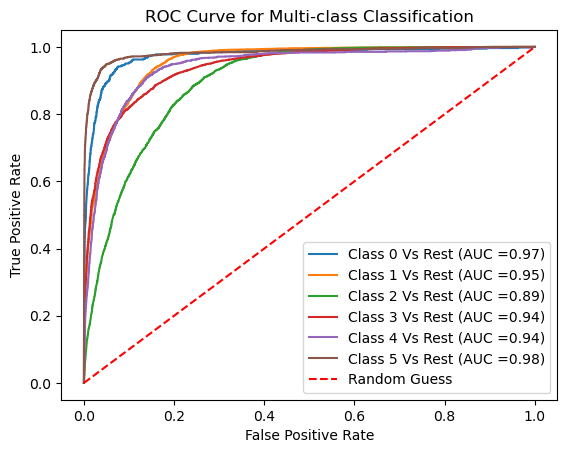

In [37]:
for i in range(len(np.unique(Y))):
    fpt,tpr,_=roc_curve(y_test==i,y_prob[:,i])
    roc_auc=auc(fpt,tpr)
    plt.plot(fpt,tpr,label=f'Class {i} Vs Rest (AUC ={roc_auc:.2f})')
    
plt.plot([0,1],[0,1],linestyle='--',color='r',label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multi-class Classification')
plt.legend()
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_prob,multi_class='ovr')

0.9477563316985599

# Making a predictive system


In [39]:
X_train.head()

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS
22808,3413379.43,2631478.61,0,0.0,9646.48,538040.10
9196,379639.85,0.00,0,0.0,-4195.67,4639.85
26673,280530.63,200000.00,0,0.0,617.32,11480.60
43089,1282994.46,231217.71,0,0.0,1193.24,272471.61
66826,124479.06,0.00,0,0.0,1.91,13594.24


In [40]:
input_data = (11434729.22,4236559.14,0,0.0,45987.69,417459.07)

In [41]:
input_data

(11434729.22, 4236559.14, 0, 0.0, 45987.69, 417459.07)

In [42]:
data = {'TOTAL_AVG_BAL': [11434729.22],
        'SIX_MONTH_BAL_OS_FD': [4236559.14],
        'NPA_FLAG': [0],
       'SIX_MONTH_BAL_OS_LEASING': [0.0],
       'CUSTOMER_PROFITABILITY': [45987.69],
       'SIX_MONTH_BAL_OS_SAVINGS': [417459.07]}
df_val = pd.DataFrame(data)

In [43]:
df_val

,TOTAL_AVG_BAL,SIX_MONTH_BAL_OS_FD,NPA_FLAG,SIX_MONTH_BAL_OS_LEASING,CUSTOMER_PROFITABILITY,SIX_MONTH_BAL_OS_SAVINGS
0,11434729.22,4236559.14,0,0.0,45987.69,417459.07


In [44]:
# Changing the input data to numpy array

In [45]:
input_data_as_numpy_array = np.asarray(input_data)

In [46]:
input_data_as_numpy_array

array([11434729.22,  4236559.14,        0.  ,        0.  ,    45987.69,
         417459.07])

In [47]:
df2 = pd.DataFrame(input_data)

In [48]:
df=pd.DataFrame(data=input_data_as_numpy_array)

In [49]:
df2

,0
0,11434729.22
1,4236559.14
2,0.00
3,0.00
4,45987.69
5,417459.07


In [50]:
#reshape the array as we are predicting for one instance

In [51]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)

[[11434729.22  4236559.14        0.          0.      45987.69   417459.07]]


In [52]:
X_resampled

array([[-0.07139446, -0.00266279, -0.34988861, -0.11968589, -0.03726559,
        -0.02288666],
       [-0.08620139, -0.03930109, -0.34988861, -0.11968589, -0.05193121,
        -0.06042009],
       [-0.08668512, -0.03651647, -0.34988861, -0.11968589, -0.0468319 ,
        -0.05993873],
       ...,
       [ 0.04146401,  0.10155053, -0.34988861, -0.11968589, -0.03050988,
        -0.02497824],
       [ 0.00352313, -0.03930109, -0.34988861, -0.11968589, -0.02127229,
        -0.05422211],
       [-0.04966956, -0.03930109, -0.34988861, -0.11968589, -0.03831153,
        -0.06074237]])

In [53]:
#Standardize data

In [54]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshape)

In [55]:
sc = joblib.load("scaler.save")
df_val1=sc.transform(df_val)

In [56]:
print(df_val1)

[[-0.03224423  0.01968488 -0.34988861 -0.11968589  0.00123757 -0.03137151]]


In [57]:
std_data

array([[0., 0., 0., 0., 0., 0.]])

In [58]:
prediction = best_xg_GCV.predict(df_val1)
print(prediction)

if prediction == 0:
    print("LNAMOUNT <=1 Lakh")
elif prediction == 1:
    print("1 Lakh < LNAMOUNT <= 5 Lakh")
elif prediction == 2:
    print("5 Lakh < LNAMOUNT <= 1M")
elif prediction == 3:
    print("1M < LNAMOUNT <= 5M")
elif prediction == 4:
    print("5M < LNAMOUNT <= 10M")
elif prediction == 5:
    print("LNAMOUNT > 10M")
else:
    print("Invalid prediction")

[4]
5M < LNAMOUNT <= 10M


In [59]:
#Probability

In [60]:
predicted_probability =  best_xg_GCV.predict_proba(df_val1)
predicted_probability
#print(f"Predicted probability: {predicted_probability[0]:.2f}")

array([[0.0672885 , 0.05026793, 0.04791566, 0.08306121, 0.41949052,
        0.33197623]], dtype=float32)

## Saving the trained model


In [61]:
import pickle

In [62]:
filename = 'Trained_model_xg.sav'
 

with open(filename, 'wb') as file:
    pickle.dump(best_xg_GCV, file)


In [63]:
#Loading the saved model
loaded_model_xg = pickle.load(open('Trained_model_xg.sav', 'rb'))


In [64]:
input_data = (11434729.22,4236559.14,0,0.0,45987.69,417459.07)

data = {'TOTAL_AVG_BAL': [11434729.22],
        'SIX_MONTH_BAL_OS_FD': [4236559.14],
        'NPA_FLAG': [0],
       'SIX_MONTH_BAL_OS_LEASING': [0.0],
       'CUSTOMER_PROFITABILITY': [45987.69],
       'SIX_MONTH_BAL_OS_SAVINGS': [417459.07]}
df_val = pd.DataFrame(data)

df2 = pd.DataFrame(input_data)

df=pd.DataFrame(data=input_data_as_numpy_array)

In [65]:
input_data_reshape = input_data_as_numpy_array.reshape(1,-1)
print(input_data_reshape)

[[11434729.22  4236559.14        0.          0.      45987.69   417459.07]]


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
std_data = scaler.fit_transform(input_data_reshape)

sc = joblib.load("scaler.save")
df_val1=sc.transform(df_val)

In [67]:
prediction = loaded_model_xg.predict(df_val1)
print(prediction)

if prediction == 0:
    print("LNAMOUNT <=1 Lakh")
elif prediction == 1:
    print("1 Lakh < LNAMOUNT <= 5 Lakh")
elif prediction == 2:
    print("5 Lakh < LNAMOUNT <= 1M")
elif prediction == 3:
    print("1M < LNAMOUNT <= 5M")
elif prediction == 4:
    print("5M < LNAMOUNT <= 10M")
elif prediction == 5:
    print("LNAMOUNT > 10M")
else:
    print("Invalid prediction")

[4]
5M < LNAMOUNT <= 10M
